In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data
dataset = pd.read_csv('wipro.csv', parse_dates=True, index_col="Date")

In [3]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-01-25,0.400000,0.400000,0.350000,0.350000,0.045882,0
1991-01-28,null,null,null,null,null,null
1991-01-29,null,null,null,null,null,null
1991-01-30,null,null,null,null,null,null
1991-01-31,0.375000,0.383330,0.375000,0.383330,0.050251,0


In [4]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-14,287.899994,296.700012,287.899994,293.000000,293.000000,129732
2018-02-15,294.000000,295.100006,290.700012,291.549988,291.549988,71678
2018-02-16,294.399994,295.649994,289.850006,290.700012,290.700012,542262
2018-02-19,292.600006,294.549988,288.649994,290.049988,290.049988,264422
2018-02-20,288.549988,292.850006,288.549988,291.350006,291.350006,218688


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6885 entries, 1991-01-25 to 2018-02-20
Data columns (total 6 columns):
Open         6885 non-null object
High         6885 non-null object
Low          6885 non-null object
Close        6885 non-null object
Adj Close    6885 non-null object
Volume       6885 non-null object
dtypes: object(6)
memory usage: 215.2+ KB


In [6]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6885,6885,6885,6885,6885,6885
unique,3274,3951,4023,4806,5204,4961
top,null,null,null,null,null,null
freq,825,825,825,825,825,825


In [7]:
# Dropping rows with null values
dataset = dataset[dataset.Open != 'null']
dataset = dataset.astype(float)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-01-25,0.40000,0.40000,0.35000,0.35000,0.045882,0.0
1991-01-31,0.37500,0.38333,0.37500,0.38333,0.050251,0.0
1991-02-07,0.37500,0.37500,0.37500,0.37500,0.049159,0.0
1991-02-08,0.37500,0.37500,0.37500,0.37500,0.049159,0.0
1991-02-15,0.36667,0.36667,0.36667,0.36667,0.048067,0.0


In [8]:
# Using asfreq() method to resample data to a daily frequency
dataset = dataset.asfreq('B',method='pad')
dataset.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-01-25,0.40000,0.40000,0.35000,0.35000,0.045882,0.0
1991-01-28,0.40000,0.40000,0.35000,0.35000,0.045882,0.0
1991-01-29,0.40000,0.40000,0.35000,0.35000,0.045882,0.0
1991-01-30,0.40000,0.40000,0.35000,0.35000,0.045882,0.0
1991-01-31,0.37500,0.38333,0.37500,0.38333,0.050251,0.0
1991-02-01,0.37500,0.38333,0.37500,0.38333,0.050251,0.0
1991-02-04,0.37500,0.38333,0.37500,0.38333,0.050251,0.0
1991-02-05,0.37500,0.38333,0.37500,0.38333,0.050251,0.0
1991-02-06,0.37500,0.38333,0.37500,0.38333,0.050251,0.0


In [9]:
dataset.index

DatetimeIndex(['1991-01-25', '1991-01-28', '1991-01-29', '1991-01-30',
               '1991-01-31', '1991-02-01', '1991-02-04', '1991-02-05',
               '1991-02-06', '1991-02-07',
               ...
               '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-12',
               '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16',
               '2018-02-19', '2018-02-20'],
              dtype='datetime64[ns]', name='Date', length=7063, freq='B')

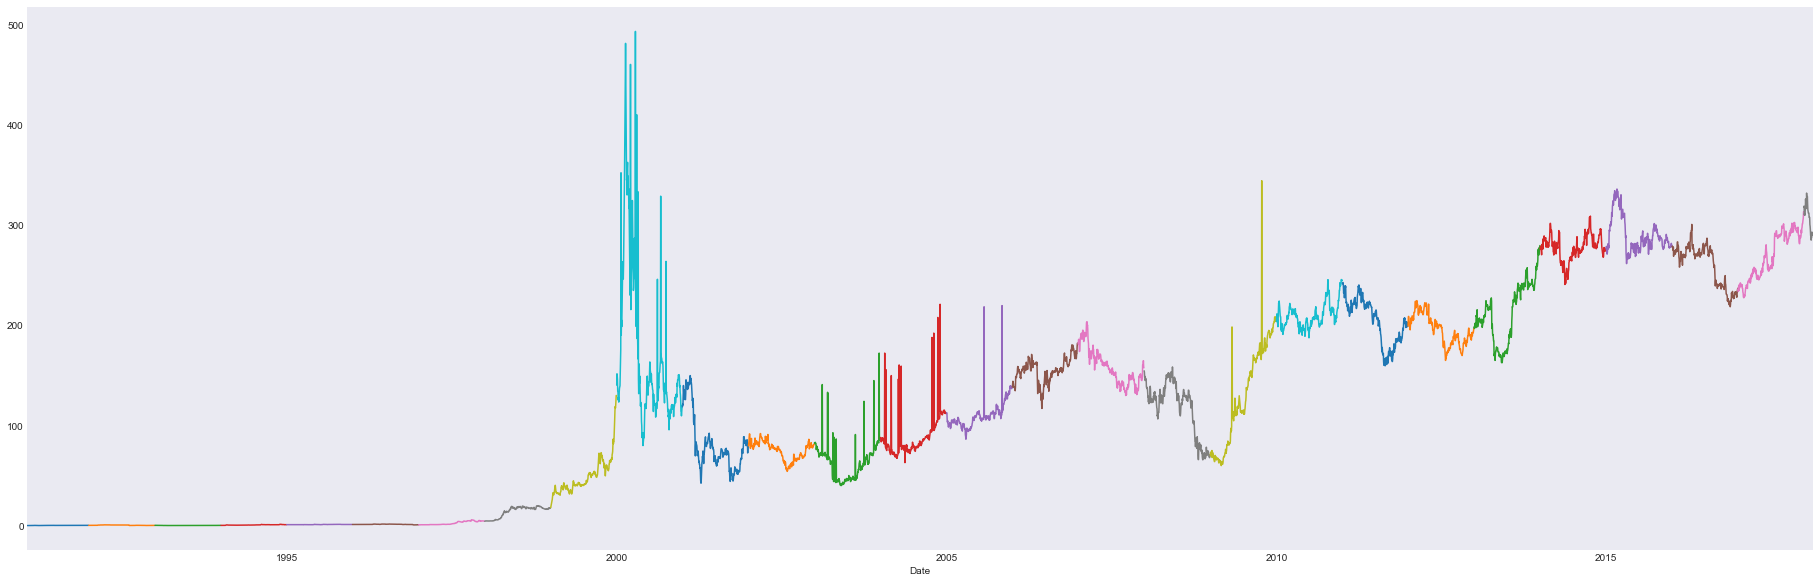

In [10]:
# Plotting Close price for the entire data highlighting by year
year_list = [str(i) for i in range(1991,2019)]
for i in year_list:
    dataset[i].Close.plot(figsize=(32,10))
plt.show()

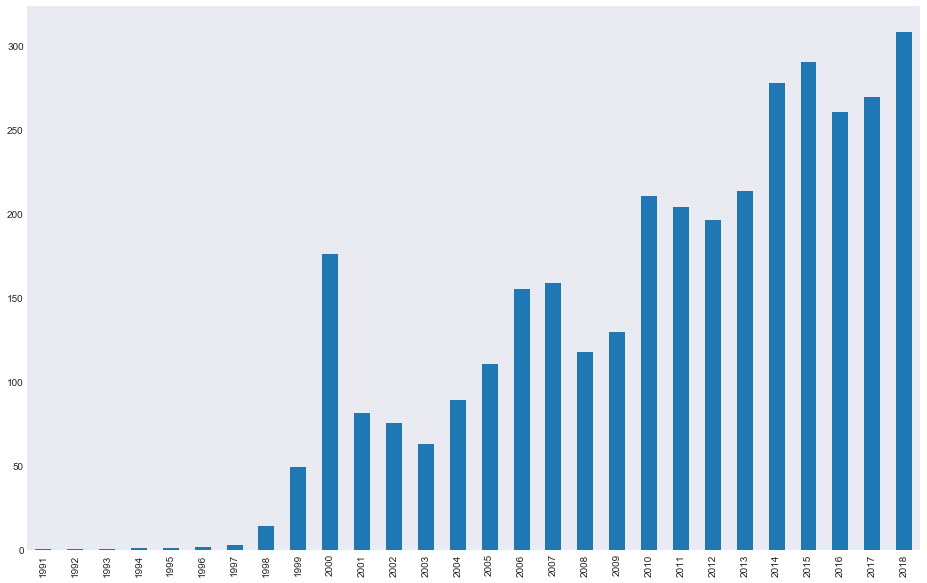

In [11]:
# Mean of closing price by year
li = []
for i in year_list:
    li.append(dataset[i].Close.mean())
pd.Series(li,year_list).plot.bar(figsize=(16,10))

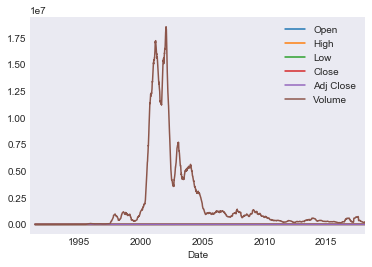

In [13]:
# Rolling mean for the dataset
dataset.rolling(window=100).mean().plot()